# Decision tree:
- a flow chart
- make a desicion based on previous experience
- whether he/she should go to comedy show

# Import library

In [9]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [10]:
shows_df = pd.read_csv("shows.csv")
shows_df.info()
shows_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          13 non-null     int64 
 1   Experience   13 non-null     int64 
 2   Rank         13 non-null     int64 
 3   Nationality  13 non-null     object
 4   Go           13 non-null     object
dtypes: int64(3), object(2)
memory usage: 648.0+ bytes


,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [11]:
# convert 'Nationality"&"Go" values to numerical: categorical data
nation_dict = {'UK':0, 'USA':1, 'N':2}
shows_df['Nationality'] = shows_df['Nationality'].map(nation_dict)

go_dict = {'YES':1, 'NO':0}
shows_df['Go'] = shows_df['Go'].map(go_dict)

shows_df.head(13)

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


# Seperate feature & target column
- feature column: input, the value we refer to
- target column: output, the value we try to predict

In [12]:
features_set = ['Age', 'Experience', 'Rank', 'Nationality']

X = shows_df[features_set]
y = shows_df['Go']

print(X)
#print(type(X))
print(y)
#print(type(y))

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


# Create a Decision Tree & show it as image

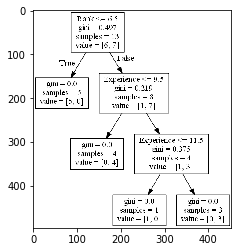

In [13]:
# create a decision tree & save as an image
d_tree = DecisionTreeClassifier()
d_tree = d_tree.fit(X,y)
tree_data = tree.export_graphviz(d_tree, out_file=None, feature_names=features_set)
tree_graph = pydotplus.graph_from_dot_data(tree_data)
tree_graph.write_png('mydecisiontree.png')

# show the image
img = pltimg.imread('mydecisiontree.png')
implot = plt.imshow(img)
plt.show()

# Predict value according to the Decision Tree

In [14]:
# should I go see a show starring a 40 years old American comedian, with 10 years of experience, and a comedy ranking of 7?
# feature data: Age=40, Experience=10, Rank=7, Nationality=1(USA)
predict_val = d_tree.predict([[40, 10, 7, 1]])
print("Should I go see a show starring a 40 years old USA comedian, with 10 years of experience, and a comedy ranking of 7?")
if predict_val == 0:
    print("NO.")
elif predict_val == 1:
    print("GO")
else:
    print("predict_val is not 0 or 1")

Should I go see a show starring a 40 years old USA comedian, with 10 years of experience, and a comedy ranking of 7?
NO.


In [15]:
# What if the comedy rank is 6?
# feature data: Age=40, Experience=10, Rank=6, Nationality=1(USA)
predict_val = d_tree.predict([[40, 10, 6, 1]])
print("Should I go see a show starring a 40 years old USA comedian, with 10 years of experience, and a comedy ranking of 7?")
if predict_val == 0:
    print("NO.")
elif predict_val == 1:
    print("GO")
else:
    print("predict_val is not 0 or 1")

Should I go see a show starring a 40 years old USA comedian, with 10 years of experience, and a comedy ranking of 7?
NO.
